In [6]:
%load_ext autoreload
%autoreload 2
from dark_matters.input import read_input_file,read_dm_output
from dark_matters.calculations import run_calculation
from dark_matters.output import fits_map,make_output
from astropy import units
from astropy.coordinates import SkyCoord
from matplotlib import pyplot as plt
import numpy as np 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
in_data = read_dm_output("coma_bb_mx-100GeV_for-practice_sync_flux.yaml")


*******************************************************
                   Warning
*******************************************************
Loading coma_bb_mx-100GeV_for-practice_sync_flux.yaml with yaml.UnsafeLoader (probably due to numpy objects)
*******************************************************


In [8]:
out_data = run_calculation(**in_data,over_write_electrons=False,clear="final")

*******************************************************
                   Warning
*******************************************************
part_data['spectrum_directory'] = C:\Users\Geoff\Documents\MEGA\Physics\Wimps\DarkMatters\dark_matters\particle_physics is not a valid folder, using default instead
*******************************************************
Beginning DarkMatters calculations
Frequency mode: radio
Calculation type: flux
Run Parameters
Frequency Samples: 100
Minimum Frequency Sampled: 1.00e+01 MHz (4.14e-17 GeV) 
Maximum Frequency Sampled: 1.00e+04 MHz (4.14e-14 GeV)
Radial Grid Intervals: 80
Minimum Sampled Radius: 2.87e-03 Mpc
Maximum Sampled Radius: 4.15e-01 Mpc
Halo Parameters: 
Halo Name: coma
Redshift z: 2.31e-02
Luminosity Distance: 1.04e+02 Mpc
Halo profile: nfw
Virial Mass: 1.20e+15 Solar Masses
Virial Radius: 2.70e+00 Mpc
Halo scale radius: 2.87e-01 Mpc
Rho_s/Rho_crit: 2.16e+04
Virial Concentration: 9.40
Gas Parameters: 
Gas density profile: flat
gas_norm: 0.00

In [9]:
data_sets = read_input_file("coma_flux.yaml")
print(data_sets)

{'halo_data': {'name': 'coma', 'profile': 'nfw', 'scale': np.float64(0.287), 'cvir': 9.4, 'rvir': np.float64(2.7), 'mvir': np.float64(1200000000000000.0), 'z': 0.0231, 'halo_weights': 'flat'}, 'mag_data': {'profile': 'beta', 'mag_norm': np.float64(4.7), 'index': -0.327, 'scale': np.float64(0.253), 'mag_func_lock': False}, 'gas_data': {'profile': 'flat', 'gas_norm': np.float64(0.00349)}, 'diff_data': {'loss_only': False, 'diff_index': 0.33333, 'diff_constant': np.float64(3.1e+28), 'diff_rmax': np.float64(0.41500000000000004)}, 'part_data': {'part_model': 'bb', 'em_model': 'annihilation', 'cross_section': 3e-26}, 'calc_data': {'calc_mode': 'flux', 'freq_mode': 'radio', 'm_wimp': array([100.]), 'f_sample_num': 80, 'f_sample_limits': array([   10., 10000.]), 'rmax_integrate': -1, 'electron_mode': 'os-python', 'os_delta_t_min': 0.1}, 'cosmo_data': {}}


In [10]:
out_data1 = run_calculation(**data_sets)

Beginning DarkMatters calculations
Frequency mode: radio
Calculation type: flux
Run Parameters
Frequency Samples: 80
Minimum Frequency Sampled: 1.00e+01 MHz (4.14e-17 GeV) 
Maximum Frequency Sampled: 1.00e+04 MHz (4.14e-14 GeV)
Radial Grid Intervals: 80
Minimum Sampled Radius: 2.87e-03 Mpc
Maximum Sampled Radius: 4.15e-01 Mpc
Halo Parameters: 
Halo Name: coma
Redshift z: 2.31e-02
Luminosity Distance: 1.04e+02 Mpc
Halo profile: nfw
Virial Mass: 1.20e+15 Solar Masses
Virial Radius: 2.70e+00 Mpc
Halo scale radius: 2.87e-01 Mpc
Rho_s/Rho_crit: 2.16e+04
Virial Concentration: 9.40
Gas Parameters: 
Gas density profile: flat
gas_norm: 0.00349 cm^-3 
Magnetic Field Parameters: 
Magnetic field profile: beta
mag_norm: 4.7 micro-Gauss 
scale: 0.253 Mpc 
index: -0.327
Spatial Diffusion
Turbulence index: 0.33
Diffusion constant: 3.10e+28 cm^2 s^-1
Now calculating for Dark Matter model: 
WIMP mass: 100.0 GeV
Particle physics: bb
Emission type: annihilation
Calculating Electron Equilibriumn Distributi

{'electron_data': 'GeV/cm^3', 'radio_em_data': 'GeV/cm^3', 'primary_em_data': 'GeV/cm^3', 'secondary_em_data': 'GeV/cm^3', 'f_sample_values': 'MHz', 'final_data': 'Jy', 'r_sample_values': 'Mpc', 'e_sample_values': 'GeV'}


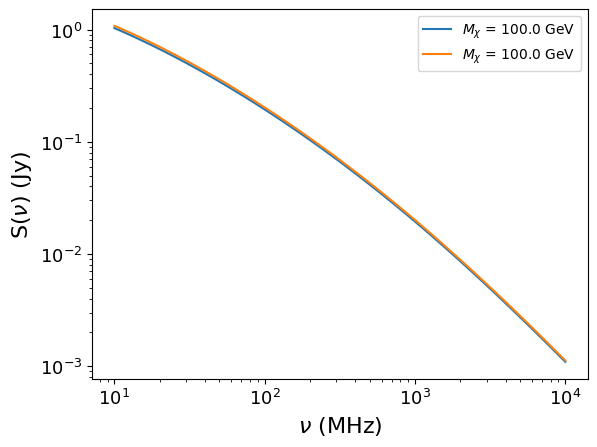

In [11]:
print(out_data['calc_data']['results']['units'])
for i in range(len(out_data['calc_data']['m_wimp'])):
    plt.plot(out_data['calc_data']['results']['f_sample_values'],out_data['calc_data']['results']['final_data'][i],label=r"$M_\chi$ = "+str(out_data['calc_data']['m_wimp'][i])+" GeV")
    plt.plot(out_data1['calc_data']['results']['f_sample_values'],out_data1['calc_data']['results']['final_data'][i],label=r"$M_\chi$ = "+str(out_data1['calc_data']['m_wimp'][i])+" GeV")
plt.xscale("log")
plt.yscale("log")
plt.ylabel(r"S$(\nu)$ (Jy)",fontsize=16)
plt.xlabel(r"$\nu$ (MHz)",fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
plt.show()